<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Jupyter_notebooks/jovemaprendiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://www.salario.com.br/tabela-salarial/aprendiz/

# Sampling distribution

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as stats
from scipy.stats import probplot
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('/content/jovemaprendiz(Planilha1).csv', encoding='latin-1', sep=";")

In [3]:
df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop=True)
df = df['Piso']
df = df.str.replace('.', '')
df = df.str.replace(',', '')
df = df.astype(float)
df

,Piso
0,143786.0
1,147516.0
2,142147.0
3,134825.0
4,138766.0
...,...
494,142366.0
495,143786.0
496,134985.0
497,143274.0


In [4]:
sample_data = pd.DataFrame({
    'Piso': df.sample(125),
    'type': 'Data',
})

In [5]:
sample_mean_05 = pd.DataFrame({
    'Piso': [df.sample(5).mean() for _ in range(125)],
    'type': 'Mean of 5',
})

In [6]:
sample_mean_20 = pd.DataFrame({
    'Piso': [df.sample(20).mean() for _ in range(125)],
    'type': 'Mean of 20',
})

In [7]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

In [8]:
results

,Piso,type
12,143786.00,Data
59,141427.00,Data
219,139807.00,Data
287,143786.00,Data
469,137846.00,Data
...,...,...
120,141860.45,Mean of 20
121,140915.90,Mean of 20
122,142233.25,Mean of 20
123,142297.65,Mean of 20


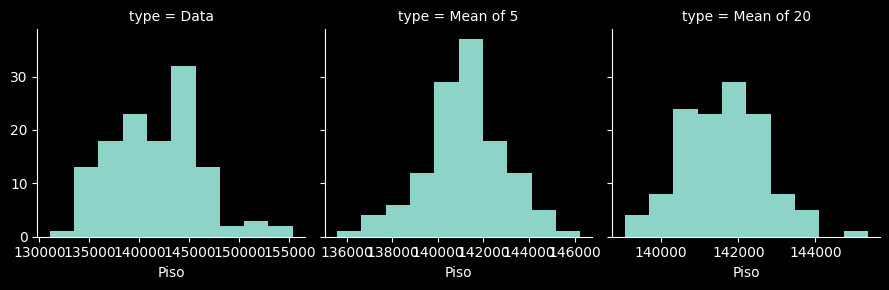

In [9]:
g = sns.FacetGrid(results, col="type", col_wrap=3, sharex=False)
g.map(plt.hist, "Piso")
plt.show()

* Standard Error formula:
$$
SE = \frac{s}{\sqrt{n}}
$$

# The Bootstrap

* the bootstrap basically draw additional samples, with replacements from sample itself and recalculate the statistics or model for each resample. It does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.
* It replicates the original sample millions of times so that you have a hyphotical population that embodies all the knowledge from your original sample.It can be used to experiment with different values for n to see how the sample distribution is affected.

Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.
5. Use the R results to:

a.Calculate their standard deviation (this estimates sample mean standard
error).
b. Produce a histogram or boxplot.
c. Find a confidence interval.

In [10]:
results = []
for nrepeat in range(125):
    sample = resample(df)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df.median()}')
print(f'bias: {results.mean() - df.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 141588.0
bias: 17.160000000003492
std.error: 474.7551049514046


# Confidence intervals

* Standard normal distributions is one in which the units on the x-axis are expressed in terms of standard deviantions away from the mean. To compare to a normal distribution, you get the z-score after standardizing the data, it is also called normalization or standardization
* The QQ-Plot is used to visually determine how close a sample is to a specified distibution, The y-axis corresponds to z-scores values and the x-axis corresponding to a quantile of a normal distribution for that value's rank. Since they are units, it corresponds to the number of standard deviations away from the mean
* The points that roughly falls on the diagonal line, then the sample distribution is considered close to normal.

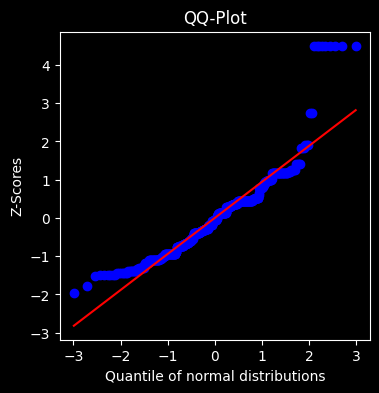

In [11]:
z_scores = (sample - np.mean(sample)) / np.std(sample)
fig, ax = plt.subplots(figsize=(4,4))
probplot(z_scores, dist="norm", plot=plt)
ax.set_xlabel("Quantile of normal distributions")
ax.set_ylabel("Z-Scores")
plt.title("QQ-Plot")
plt.show()

In [12]:
st.t.interval(confidence=0.90, df=len(sample)-1, loc=np.mean(sample), scale=st.sem(sample))

(141189.03881748993, 141933.30987990485)

# Student's t-Distribution

* Reference for a distribution of a sample mean, the difference from the two means, regression parameters
* a Family of distributions resembling the normal distribution but with thicker tails

$$
\bar{x} \pm t_{n-1}(0.05) \cdot \frac{s}{\sqrt{n}}
$$